# Deep Learning Math: Topic Modeling

Seongtae Kim (2021-01-12)

## 1. LSA: Latent Semantic Analysis (30분)

### 파일 불러오기 & 토큰화

In [3]:
from utils import file_finder
paths, names = file_finder("./lsa")

from eunjeon import Mecab
mecab = Mecab()

docs=[]

for path, name in zip(paths, names):
    docs.append((name, mecab.pos(open(path, "r").read())))

In [4]:
import pickle
with open("./docs_tokenized.pkl", "wb") as f:
    pickle.dump(docs, f)

In [2]:
# 단어장 생성 함수
def make_word_dict(doc, pos=["NNP", "NNG"]): # "ALL" to extract all pos
    dic={}
    for token in doc:
        if pos == "ALL":
            if token not in dic.keys():
                dic[token]=1
            else:
                dic[token]+=1
        else:
            if token[1] in pos:
                if token not in dic.keys():
                    dic[token]=1
                else:
                    dic[token]+=1
        
    return {k:v for k, v in sorted(dic.items(), key=lambda item: item[1], reverse=True)}

In [3]:
# 모든 문서에서 단어장 생성
tokens=[]
for doc in docs:
    tokens.extend(doc)
dic = make_word_dict(tokens)

In [4]:
dic

{('때', 'NNG'): 176,
 ('사람', 'NNG'): 167,
 ('일', 'NNG'): 164,
 ('말', 'NNG'): 160,
 ('조선', 'NNP'): 158,
 ('뒤', 'NNG'): 110,
 ('군', 'NNG'): 104,
 ('고려', 'NNG'): 96,
 ('일본', 'NNP'): 93,
 ('집', 'NNG'): 88,
 ('시작', 'NNG'): 87,
 ('생각', 'NNG'): 83,
 ('소리', 'NNG'): 81,
 ('전', 'NNG'): 79,
 ('전쟁', 'NNG'): 79,
 ('속', 'NNG'): 78,
 ('서비스', 'NNG'): 76,
 ('전투', 'NNG'): 74,
 ('어머니', 'NNG'): 68,
 ('홍건적', 'NNG'): 65,
 ('눈', 'NNG'): 64,
 ('이후', 'NNG'): 63,
 ('후', 'NNG'): 62,
 ('얼굴', 'NNG'): 61,
 ('애플', 'NNP'): 60,
 ('손', 'NNG'): 60,
 ('당시', 'NNG'): 57,
 ('보안', 'NNG'): 55,
 ('공격', 'NNG'): 54,
 ('아내', 'NNG'): 53,
 ('사건', 'NNG'): 52,
 ('길', 'NNG'): 51,
 ('점', 'NNG'): 49,
 ('고구려', 'NNG'): 49,
 ('신라', 'NNP'): 49,
 ('사단', 'NNG'): 49,
 ('미국', 'NNP'): 48,
 ('방', 'NNG'): 48,
 ('노인', 'NNG'): 48,
 ('위', 'NNG'): 47,
 ('날', 'NNG'): 47,
 ('기술', 'NNG'): 46,
 ('소녀', 'NNG'): 44,
 ('앞', 'NNG'): 43,
 ('서울', 'NNP'): 43,
 ('배', 'NNG'): 42,
 ('이상', 'NNG'): 42,
 ('나라', 'NNG'): 42,
 ('이번', 'NNG'): 41,
 ('영감', 'NNG'): 41,
 ('이용',

In [5]:
list(dic.keys())

[('때', 'NNG'),
 ('사람', 'NNG'),
 ('일', 'NNG'),
 ('말', 'NNG'),
 ('조선', 'NNP'),
 ('뒤', 'NNG'),
 ('군', 'NNG'),
 ('고려', 'NNG'),
 ('일본', 'NNP'),
 ('집', 'NNG'),
 ('시작', 'NNG'),
 ('생각', 'NNG'),
 ('소리', 'NNG'),
 ('전', 'NNG'),
 ('전쟁', 'NNG'),
 ('속', 'NNG'),
 ('서비스', 'NNG'),
 ('전투', 'NNG'),
 ('어머니', 'NNG'),
 ('홍건적', 'NNG'),
 ('눈', 'NNG'),
 ('이후', 'NNG'),
 ('후', 'NNG'),
 ('얼굴', 'NNG'),
 ('애플', 'NNP'),
 ('손', 'NNG'),
 ('당시', 'NNG'),
 ('보안', 'NNG'),
 ('공격', 'NNG'),
 ('아내', 'NNG'),
 ('사건', 'NNG'),
 ('길', 'NNG'),
 ('점', 'NNG'),
 ('고구려', 'NNG'),
 ('신라', 'NNP'),
 ('사단', 'NNG'),
 ('미국', 'NNP'),
 ('방', 'NNG'),
 ('노인', 'NNG'),
 ('위', 'NNG'),
 ('날', 'NNG'),
 ('기술', 'NNG'),
 ('소녀', 'NNG'),
 ('앞', 'NNG'),
 ('서울', 'NNP'),
 ('배', 'NNG'),
 ('이상', 'NNG'),
 ('나라', 'NNG'),
 ('이번', 'NNG'),
 ('영감', 'NNG'),
 ('이용', 'NNG'),
 ('해', 'NNG'),
 ('밤', 'NNG'),
 ('세력', 'NNG'),
 ('시간', 'NNG'),
 ('고객', 'NNG'),
 ('다음', 'NNG'),
 ('주장', 'NNG'),
 ('침공', 'NNG'),
 ('애', 'NNG'),
 ('문제', 'NNG'),
 ('자리', 'NNG'),
 ('물', 'NNG'),
 ('서인', 'N

In [6]:
# Document-Term Frequency 행렬 생성 함수
def extract_word_indicies(docs, dic): # base on DTM
    import numpy as np
    vectors=[]
    for doc in docs:
        vector = [0]*len(dic)
        for i, word in enumerate(dic):
            for token in doc:
                if word == token:
                    vector[i]+=1
        vectors.append(vector)
    return np.array(vectors)

In [7]:
# 모든 문서를 이용하여 행렬 생성
A = extract_word_indicies(docs, dic)

In [8]:
# 문서의 개수 x 모든 문서에서 등장하는 단어의 개수
print(A)
print(A.shape)

[[0 1 0 ... 0 0 0]
 [2 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 2 3 ... 0 0 0]
 [2 1 0 ... 0 0 0]
 [0 1 2 ... 1 1 1]]
(60, 7634)


### SVD

In [9]:
# numpy 패키지에서 제공하는 SVD 함수 이용 => Full SVD 수행
import numpy as np
U, s, VT = np.linalg.svd(A, full_matrices=True)

In [10]:
# 직교행렬 U의 크기는 문서의 개수 x 문서의 개수
#print(U.round(2))
print(np.shape(U))

(60, 60)


In [11]:
# *****************************************************************
# s는 특이값의 리스트 (numpy가 제공하는 함수 특성상) => 대각행렬로 변환 필요
# 내림차순으로 정렬된 것을 볼 수 있음 (정보량, topic strength)
print(s.round(2))
print(np.shape(s))
# *****************************************************************

[116.7  100.85  87.42  80.02  74.02  72.3   68.17  66.13  61.24  58.89
  58.87  57.76  57.44  56.58  55.85  55.11  54.07  54.    51.8   49.89
  48.95  47.43  45.83  44.55  43.79  42.16  41.51  39.85  39.58  38.72
  37.73  37.58  37.35  37.11  36.98  35.57  35.41  34.9   34.34  34.24
  33.87  32.8   32.36  32.1   31.55  30.94  30.53  29.2   28.82  28.45
  28.08  26.37  25.44  24.71  24.37  23.94  22.56  22.41  21.3   20.44]
(60,)


In [12]:
# 대각행렬로 변환
S = np.zeros(A.shape)
d = A.shape[0]
S[:d, :d] = np.diag(s)
print(S.round(2))
np.shape(S)

[[116.7    0.     0.   ...   0.     0.     0.  ]
 [  0.   100.85   0.   ...   0.     0.     0.  ]
 [  0.     0.    87.42 ...   0.     0.     0.  ]
 ...
 [  0.     0.     0.   ...   0.     0.     0.  ]
 [  0.     0.     0.   ...   0.     0.     0.  ]
 [  0.     0.     0.   ...   0.     0.     0.  ]]


(60, 7634)

In [13]:
# V의 전치행렬인 VT
print(VT.round(2)) # 각 단어 벡터의 잠재 의미
print(np.shape(VT))

[[-0.15 -0.13 -0.13 ... -0.   -0.   -0.  ]
 [ 0.21  0.24  0.24 ...  0.    0.    0.  ]
 [-0.08 -0.11 -0.14 ...  0.    0.    0.  ]
 ...
 [ 0.   -0.   -0.   ...  1.   -0.   -0.  ]
 [ 0.   -0.   -0.   ... -0.    1.   -0.  ]
 [ 0.   -0.   -0.   ... -0.   -0.    1.  ]]
(7634, 7634)


In [14]:
# U x S x VT를 했을 경우 다시 기존의 행렬 A가 나오는가?
confirmation = np.allclose(A, np.dot(np.dot(U, S), VT).round(2))
print(confirmation)
print()
print(A)
print(np.dot(np.dot(U, S), VT).round(2))

True

[[0 1 0 ... 0 0 0]
 [2 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 2 3 ... 0 0 0]
 [2 1 0 ... 0 0 0]
 [0 1 2 ... 1 1 1]]
[[ 0.  1.  0. ... -0. -0. -0.]
 [ 2.  0.  0. ...  0.  0.  0.]
 [ 1.  0.  0. ... -0. -0. -0.]
 ...
 [-0.  2.  3. ...  0.  0.  0.]
 [ 2.  1. -0. ... -0. -0. -0.]
 [-0.  1.  2. ...  1.  1.  1.]]


### SVD Truncation

In [15]:
# t 값을 크게 잡을 수록 노이즈가 생기지만 풍부한 의미를
# 작게 잡을 수록 정확한 결과를 제공한다.
t = 3

In [16]:
# 본래 S 행렬에서 상위 t개만 추출
S_prime = S[:t, :t]
print("{} -> {}".format(np.shape(S),np.shape(S_prime)))
print()
print(S_prime.round(2))

(60, 7634) -> (3, 3)

[[116.7    0.     0.  ]
 [  0.   100.85   0.  ]
 [  0.     0.    87.42]]


In [17]:
# 본래 U 행렬에서 상위 t개만 추출
U_prime = U[:, :t]
print("{} -> {}".format(np.shape(U),np.shape(U_prime)))
print()
print(U_prime.round(2)) 

(60, 60) -> (60, 3)

[[-0.02  0.02 -0.01]
 [-0.03  0.03  0.01]
 [-0.02  0.01 -0.01]
 [-0.02  0.02  0.01]
 [-0.02  0.01 -0.  ]
 [-0.01  0.01  0.  ]
 [-0.03  0.04 -0.01]
 [-0.05  0.03  0.02]
 [-0.04  0.04 -0.01]
 [-0.01  0.    0.  ]
 [-0.02  0.01  0.  ]
 [-0.04  0.02  0.01]
 [-0.03  0.03 -0.  ]
 [-0.02  0.02  0.  ]
 [-0.01  0.01  0.  ]
 [-0.04  0.04  0.04]
 [-0.05  0.07 -0.02]
 [-0.02  0.01  0.  ]
 [-0.02  0.01  0.01]
 [-0.02  0.01  0.01]
 [-0.05  0.09 -0.04]
 [-0.06  0.12 -0.08]
 [-0.09  0.17 -0.11]
 [-0.12  0.24 -0.17]
 [-0.11  0.2  -0.1 ]
 [-0.06  0.1  -0.04]
 [-0.05  0.1  -0.07]
 [-0.05  0.1  -0.06]
 [-0.1   0.2  -0.15]
 [-0.03  0.05 -0.02]
 [-0.08  0.18 -0.14]
 [-0.12  0.18 -0.07]
 [-0.13  0.3  -0.29]
 [-0.08  0.17 -0.12]
 [-0.06  0.12 -0.1 ]
 [-0.04  0.08 -0.05]
 [-0.09  0.17 -0.11]
 [-0.09  0.17 -0.1 ]
 [-0.06  0.13 -0.08]
 [-0.07  0.15 -0.11]
 [-0.12  0.04  0.14]
 [-0.67 -0.61 -0.37]
 [-0.06  0.04  0.02]
 [-0.24  0.09  0.35]
 [-0.19 -0.01 -0.  ]
 [-0.1   0.07  0.1 ]
 [-0.12  0.11

In [18]:
# 본래 VT 행렬에서 상위 t개만 추출
VT_prime = VT[:t,:]
print("{} -> {}".format(np.shape(VT),np.shape(VT_prime)))
print()
print(VT_prime.round(2))

(7634, 7634) -> (3, 7634)

[[-0.15 -0.13 -0.13 ... -0.   -0.   -0.  ]
 [ 0.21  0.24  0.24 ...  0.    0.    0.  ]
 [-0.08 -0.11 -0.14 ...  0.    0.    0.  ]]


In [19]:
# 문서 U와 정보량 벡터인 S를 연산할 경우 각 문서가 상위 t개의 잠재 의미 분류에서 어떠한 위치를 가지는지 알 수 있다.
US = np.dot(U_prime, S_prime)
print(np.shape(US))

(60, 3)


In [20]:
# 우리는 t개의 잠재의미가 있다고 가정했다. 각 문서들의 잠재의미에 대한 위치는 다음과 같다.
import pandas as pd
tp_srs = pd.DataFrame(index=names)
for i, row in enumerate(US.round(2)):
    for j, item in enumerate(row):
        tp_srs.loc[names[i], j] = round(item, 2)
tp_srs

,0,1,2
IT_14.txt,-1.98,2.11,-0.62
IT_9.txt,-3.68,2.61,1.14
IT_1.txt,-2.27,1.06,-0.98
IT_10.txt,-2.16,1.71,0.62
IT_4.txt,-2.09,1.04,-0.19
IT_11.txt,-0.74,0.51,0.09
IT_20.txt,-3.74,4.32,-1.26
IT_19.txt,-5.98,3.06,1.71
IT_5.txt,-4.28,4.46,-0.58
IT_12.txt,-0.88,0.50,0.34


### Visualization

In [21]:
# 보기 쉽게 시각화를 해보자
x_data_1 = list(tp_srs[0])[:20]
x_data_2 = list(tp_srs[0])[21:40]
x_data_3 = list(tp_srs[0])[41:]

y_data_1 = list(tp_srs[1])[:20]
y_data_2 = list(tp_srs[1])[21:40]
y_data_3 = list(tp_srs[1])[41:]

z_data_1 = list(tp_srs[2])[:20]
z_data_2 = list(tp_srs[2])[21:40]
z_data_3 = list(tp_srs[2])[41:]

<IPython.core.display.Javascript object>


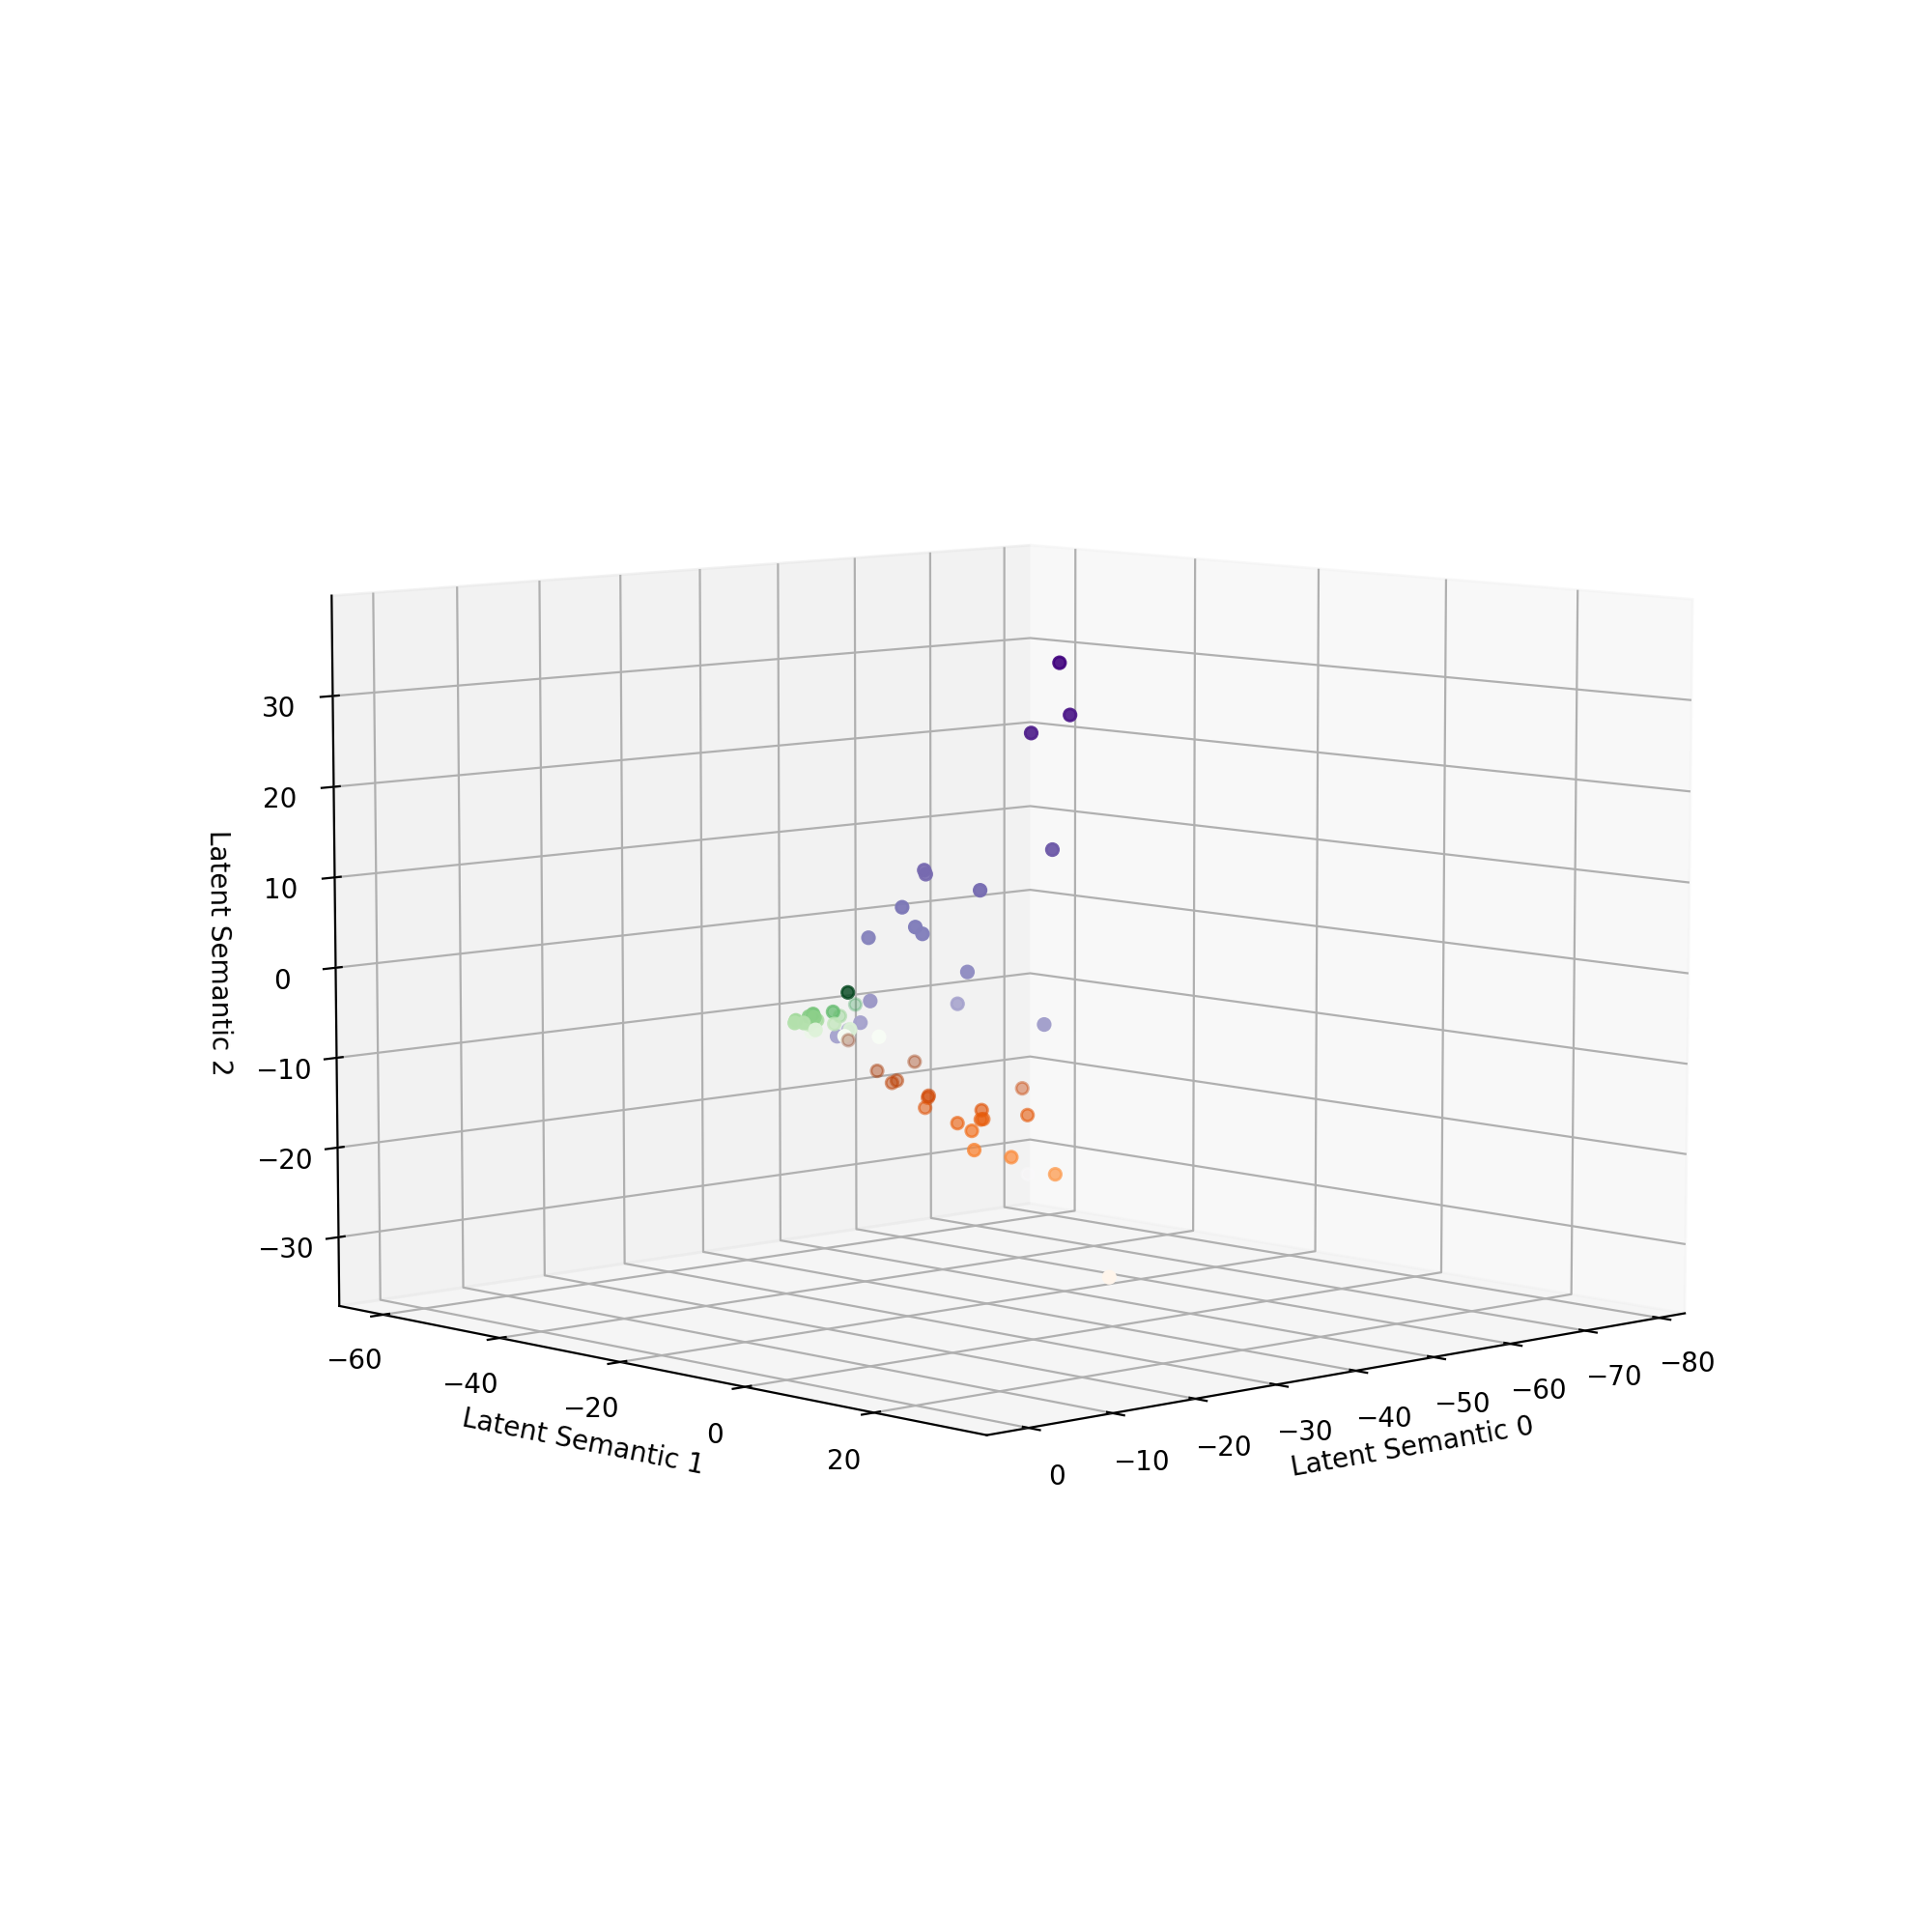

Text(0.5, 0, 'Latent Semantic 2')

In [25]:
from mpl_toolkits import mplot3d
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111, projection="3d")

zline = np.linspace(0, 5, 100)
xline = np.sin(zline)
yline = np.cos(zline)

ax.scatter3D(x_data_1, y_data_1, z_data_1, c=z_data_1, cmap="Greens")
ax.scatter3D(x_data_2, y_data_2, z_data_2, c=z_data_2, cmap="Oranges")
ax.scatter3D(x_data_3, y_data_3, z_data_3, c=z_data_3, cmap="Purples")

ax.set_xlabel("Latent Semantic 0")
ax.set_ylabel("Latent Semantic 1")
ax.set_zlabel("Latent Semantic 2")

In [23]:
# tuncation의 결과로 생겨난 파생 행렬인 A_prime은 행렬 A와 크기는 같지만 기존의 행렬 S, VT, U가 잘려나갔기 때문에 이제는 다시 모두 곱한다고 원상태로 복귀되지 않는다.
A_prime=np.dot(US, VT_prime)
print(A)
print(A_prime.round(2))
print("{} -> {}".format(np.shape(A),np.shape(A_prime)))

[[0 1 0 ... 0 0 0]
 [2 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 2 3 ... 0 0 0]
 [2 1 0 ... 0 0 0]
 [0 1 2 ... 1 1 1]]
[[0.79 0.83 0.84 ... 0.   0.   0.  ]
 [1.02 0.97 0.94 ... 0.01 0.01 0.01]
 [0.64 0.66 0.67 ... 0.   0.   0.  ]
 ...
 [2.19 1.79 1.54 ... 0.03 0.03 0.03]
 [2.89 1.51 0.75 ... 0.07 0.07 0.07]
 [1.44 0.8  0.49 ... 0.03 0.03 0.03]]
(60, 7634) -> (60, 7634)


In [24]:
import pandas as pd
import re
column_names = [re.sub("'", "", str(k)) for k in dic.keys()]
result = pd.DataFrame(columns=column_names, index=names)

for i, row in enumerate(A_prime.round(2)):
    for j, item in enumerate(row):
        result.loc[names[i], column_names[j]] = round(item, 2)
result

,"(때, NNG)","(사람, NNG)","(일, NNG)","(말, NNG)","(조선, NNP)","(뒤, NNG)","(군, NNG)","(고려, NNG)","(일본, NNP)","(집, NNG)",...,"(중우, NNG)","(중좌, NNG)","(이교성, NNP)","(백발, NNG)","(분배, NNG)","(일군, NNG)","(선봉, NNG)","(지형, NNG)","(비전투원, NNG)","(매복지, NNG)"
IT_14.txt,0.79,0.83,0.84,0.76,0.5,0.41,0.18,0.14,0.25,0.53,...,0,0,0,0,0,0,0,0,0,0
IT_9.txt,1.02,0.97,0.94,0.84,1.68,0.62,0.52,0.2,0.87,0.51,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
IT_1.txt,0.64,0.66,0.67,0.62,0.29,0.34,0.4,0.64,0.14,0.43,...,0,0,0,0,0,0,0,0,0,0
IT_10.txt,0.64,0.62,0.6,0.54,0.99,0.38,0.28,0.07,0.51,0.33,...,0,0,0,0,0,0,0,0,0,0
IT_4.txt,0.55,0.54,0.54,0.49,0.56,0.32,0.36,0.42,0.29,0.32,...,0,0,0,0,0,0,0,0,0,0
IT_11.txt,0.21,0.21,0.2,0.18,0.28,0.12,0.11,0.07,0.14,0.12,...,0,0,0,0,0,0,0,0,0,0
IT_20.txt,1.56,1.65,1.68,1.51,0.96,0.81,0.3,0.19,0.47,1.06,...,0,0,0,0,0,0,0,0,0,0
IT_19.txt,1.42,1.31,1.26,1.14,2.52,0.9,1.01,0.72,1.31,0.67,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
IT_5.txt,1.62,1.68,1.69,1.52,1.38,0.87,0.41,0.18,0.69,1.04,...,0,0,0,0,0,0,0,0,0,0
IT_12.txt,0.21,0.19,0.18,0.17,0.41,0.14,0.14,0.07,0.22,0.1,...,0,0,0,0,0,0,0,0,0,0


## 2. LDA: Latent Dirichlet Allocation (30분)

In [23]:
def make_word_dict(doc, pos=["NNP", "NNG"]): # "ALL" to extract all pos
    dic={}
    for token in doc:
        if pos == "ALL":
            if token not in dic.keys():
                dic[token]=1
            else:
                dic[token]+=1
        else:
            if token[1] in pos:
                if token not in dic.keys():
                    dic[token]=1
                else:
                    dic[token]+=1
        
    return {k:v for k, v in sorted(dic.items(), key=lambda item: item[1], reverse=True)}

def extract_word_indicies(docs, dic): # base on DTM
    import numpy as np
    vectors=[]
    for doc in docs:
        vector = [0]*len(dic)
        for i, word in enumerate(dic):
            for token in doc:
                if word == token:
                    vector[i]+=1
        vectors.append(vector)
    return np.array(vectors)

In [24]:
# 이번에는 주제별로 문서를 미리 나누어보자

from seongtae_utils import file_finder
from eunjeon import Mecab
mecab = Mecab()

i_paths, i_names = file_finder("./math/lsa/IT")
h_paths, h_names = file_finder("./math/lsa/history")
n_paths, n_names = file_finder("./math/lsa/novel/")

its=[]
histories=[]
novels=[]
whole_tokens=[]

for path, name in zip(i_paths, i_names):
    its.append(mecab.pos(open(path, "r").read()))
    whole_tokens.extend(mecab.pos(open(path, "r").read()))
for path, name in zip(h_paths, h_names):
    histories.append(mecab.pos(open(path, "r").read()))
    whole_tokens.extend(mecab.pos(open(path, "r").read()))
for path, name in zip(n_paths, n_names):
    novels.append(mecab.pos(open(path, "r").read()))
    whole_tokens.extend(mecab.pos(open(path, "r").read()))

In [25]:
# 각 주제별 문서들을 토큰 단위로 flatten -> 주제별로 단어장을 생성한다.

it_tokens=[]
for doc in its:
    it_tokens.extend(doc)
it_dic = make_word_dict(it_tokens)

histories_tokens=[]
for doc in histories:
    histories_tokens.extend(doc)
histories_dic = make_word_dict(histories_tokens)

novels_tokens=[]
for doc in novels:
    novels_tokens.extend(doc)
novels_dic = make_word_dict(novels_tokens)

In [26]:
# 전체 단어장의 모습 -> 단어 앞의 숫자는 각 단어의 고유 id가 된다.
whole_dic = {i: repr(k) for i, k in enumerate(make_word_dict(whole_tokens).keys())}
whole_dic

{0: "('때', 'NNG')",
 1: "('사람', 'NNG')",
 2: "('일', 'NNG')",
 3: "('말', 'NNG')",
 4: "('조선', 'NNP')",
 5: "('뒤', 'NNG')",
 6: "('군', 'NNG')",
 7: "('고려', 'NNG')",
 8: "('일본', 'NNP')",
 9: "('집', 'NNG')",
 10: "('시작', 'NNG')",
 11: "('생각', 'NNG')",
 12: "('소리', 'NNG')",
 13: "('전', 'NNG')",
 14: "('전쟁', 'NNG')",
 15: "('속', 'NNG')",
 16: "('서비스', 'NNG')",
 17: "('전투', 'NNG')",
 18: "('어머니', 'NNG')",
 19: "('홍건적', 'NNG')",
 20: "('눈', 'NNG')",
 21: "('이후', 'NNG')",
 22: "('후', 'NNG')",
 23: "('얼굴', 'NNG')",
 24: "('애플', 'NNP')",
 25: "('손', 'NNG')",
 26: "('당시', 'NNG')",
 27: "('보안', 'NNG')",
 28: "('공격', 'NNG')",
 29: "('아내', 'NNG')",
 30: "('사건', 'NNG')",
 31: "('길', 'NNG')",
 32: "('점', 'NNG')",
 33: "('고구려', 'NNG')",
 34: "('신라', 'NNP')",
 35: "('사단', 'NNG')",
 36: "('미국', 'NNP')",
 37: "('방', 'NNG')",
 38: "('노인', 'NNG')",
 39: "('위', 'NNG')",
 40: "('날', 'NNG')",
 41: "('기술', 'NNG')",
 42: "('소녀', 'NNG')",
 43: "('앞', 'NNG')",
 44: "('서울', 'NNP')",
 45: "('배', 'NNG')",
 46: "('이상',

In [27]:
# 단어장의 모든 단어 개수
print(len(whole_dic))

7634


In [28]:
# 이번에는 각 단어들을 출현 빈도에 따라서 정리 해보자
def encode(tokens, dic, freq_dic): # encoding by (word_id, freq)
    from tqdm.notebook import tqdm
    encoded=[]
    for token in tqdm(tokens):
        for i in dic:
            word = dic[i]
            if word == token:
                freq = freq_dic[word]
                encoded.append((i, freq))
                break
    return encoded

In [29]:
# 단어 - 빈도
for k,v in it_dic.items():
    print("단어:{}\n빈도:{:,}".format(k, v))
    print()
    break

단어:('서비스', 'NNG')
빈도:76



In [30]:
# 튜플로 이루어진 결과 또한 단어로 생각하여 모두 스트링으로 만든다.
it_dic_str = {repr(k):v for k, v in it_dic.items()}
histories_dic_str = {repr(k):v for k, v in histories_dic.items()}
novels_dic_str = {repr(k):v for k, v in novels_dic.items()}

it_tokens_str = [repr(token) for token in it_tokens]
histories_tokens_str = [repr(token) for token in histories_tokens]
novels_tokens_str = [repr(token) for token in novels_tokens]

In [31]:
# 각 주제의 토큰들을 (단어-빈도) 의 형식으로 정리한다.
it_encoded=encode(it_tokens_str, whole_dic, it_dic_str)
history_encoded=encode(histories_tokens_str, whole_dic, histories_dic_str)
novel_encoded=encode(novels_tokens_str, whole_dic, novels_dic_str)    

In [32]:
# (단어_id - 문서 내 빈도)
it_encoded

[(948, 4),
 (949, 6),
 (471, 11),
 (950, 4),
 (792, 7),
 (949, 6),
 (2379, 2),
 (1147, 4),
 (527, 10),
 (471, 11),
 (684, 8),
 (1733, 3),
 (153, 23),
 (1734, 3),
 (1735, 3),
 (685, 8),
 (471, 11),
 (1148, 5),
 (685, 8),
 (949, 6),
 (471, 11),
 (1149, 1),
 (3633, 1),
 (425, 12),
 (365, 7),
 (153, 23),
 (1736, 1),
 (54, 13),
 (153, 23),
 (118, 27),
 (45, 10),
 (1737, 3),
 (528, 4),
 (793, 5),
 (686, 5),
 (153, 23),
 (118, 27),
 (472, 10),
 (1735, 3),
 (685, 8),
 (1148, 5),
 (685, 8),
 (3634, 1),
 (163, 10),
 (3635, 1),
 (119, 26),
 (951, 3),
 (153, 23),
 (1150, 5),
 (952, 6),
 (953, 2),
 (153, 23),
 (1150, 5),
 (952, 6),
 (50, 30),
 (596, 9),
 (2380, 2),
 (2381, 2),
 (1147, 4),
 (684, 8),
 (2382, 1),
 (270, 15),
 (243, 16),
 (950, 4),
 (597, 4),
 (598, 3),
 (302, 11),
 (1738, 3),
 (954, 2),
 (153, 23),
 (270, 15),
 (243, 16),
 (950, 4),
 (597, 4),
 (303, 2),
 (204, 16),
 (3636, 1),
 (1374, 3),
 (3637, 1),
 (205, 17),
 (1151, 5),
 (1152, 3),
 (529, 3),
 (471, 11),
 (13, 8),
 (153, 23),
 (

In [33]:
for i in range(10):
    print("단어 id: {}\n실제 단어:{}".format(it_encoded[i][0], whole_dic[it_encoded[i][0]]))
    print()

단어 id: 948
실제 단어:('창문', 'NNG')

단어 id: 949
실제 단어:('자전거', 'NNG')

단어 id: 471
실제 단어:('오토바이', 'NNG')

단어 id: 950
실제 단어:('신고', 'NNG')

단어 id: 792
실제 단어:('도보', 'NNG')

단어 id: 949
실제 단어:('자전거', 'NNG')

단어 id: 2379
실제 단어:('운송', 'NNG')

단어 id: 1147
실제 단어:('수단', 'NNG')

단어 id: 527
실제 단어:('등록', 'NNG')

단어 id: 471
실제 단어:('오토바이', 'NNG')



In [34]:
# 각 주제별로 (단어id-빈도) 형식의 문서들을 리스트로 구분하여 코퍼스에 정리한다.
corpus = [it_encoded]+[history_encoded]+[novel_encoded]

In [39]:
# 우리가 보고 싶은 주제는 topics_num으로 지정, 100회 훈련, 4개의 단어만 출력
# (당연히 num_words는 topics_num보다 작아야 한다.)
import gensim
topics_num = 3
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=topics_num,
                    id2word=whole_dic, passes=100)
topics = ldamodel.print_topics(num_words=10)
for topic in topics:
    print(topic)

/home/seongtae/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(0, '0.012*"(\'일\', \'NNG\')" + 0.011*"(\'사람\', \'NNG\')" + 0.010*"(\'말\', \'NNG\')" + 0.009*"(\'때\', \'NNG\')" + 0.007*"(\'집\', \'NNG\')" + 0.007*"(\'소리\', \'NNG\')" + 0.006*"(\'생각\', \'NNG\')" + 0.006*"(\'속\', \'NNG\')" + 0.005*"(\'어머니\', \'NNG\')" + 0.005*"(\'얼굴\', \'NNG\')"')
(1, '0.010*"(\'조선\', \'NNP\')" + 0.006*"(\'군\', \'NNG\')" + 0.006*"(\'고려\', \'NNG\')" + 0.006*"(\'일본\', \'NNP\')" + 0.005*"(\'전쟁\', \'NNG\')" + 0.005*"(\'전투\', \'NNG\')" + 0.004*"(\'홍건적\', \'NNG\')" + 0.004*"(\'이후\', \'NNG\')" + 0.003*"(\'때\', \'NNG\')" + 0.003*"(\'공격\', \'NNG\')"')
(2, '0.008*"(\'서비스\', \'NNG\')" + 0.006*"(\'애플\', \'NNP\')" + 0.006*"(\'보안\', \'NNG\')" + 0.005*"(\'기술\', \'NNG\')" + 0.004*"(\'고객\', \'NNG\')" + 0.004*"(\'아이폰\', \'NNP\')" + 0.003*"(\'비트코인\', \'NNP\')" + 0.003*"(\'정보\', \'NNG\')" + 0.003*"(\'제공\', \'NNG\')" + 0.003*"(\'기업\', \'NNG\')"')


### pyLDAvis

pyLDAvis는 LDA를 시각화할 수 있는 유용한 툴이다. gensim lda와 연동되는데 이를 위하여 gensim의 툴로 다시 한번 코퍼스와 단어장을 정의해보자

In [40]:
from gensim import corpora
corpus_tokens = [it_tokens_str]+[histories_tokens_str]+[novels_tokens_str] # gensim 규격에 맞는 코퍼스 생성
dictionary = corpora.Dictionary(corpus_tokens) # gensim lda용 단어장 생성
corpus_ids = [dictionary.doc2bow(text) for text in corpus_tokens] # gensim에서 자체적으로 제공하는 (단어id-빈도) 생성 툴

/home/seongtae/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [41]:
# 바로 위 셀에서 설정된 세팅으로 모델 생성
import gensim
topics_num = 3
ldamodel = gensim.models.ldamodel.LdaModel(corpus_ids, num_topics=topics_num,
                    id2word=dictionary, passes=100)

/home/seongtae/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [42]:
# 시각화
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel,corpus_ids, dictionary)
pyLDAvis.display(vis)

/home/seongtae/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
